## 1. iris 데이터 불러오기 

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

## 2. boxplot 그리기

In [15]:
import pandas as pd

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


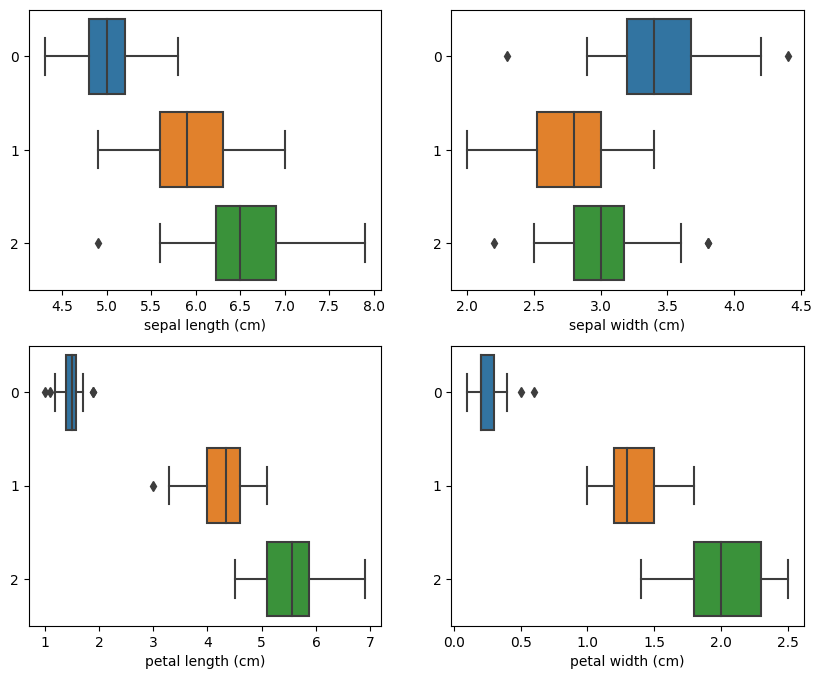

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df_iris.iloc[:,i], y=iris.target, orient='h')

plt.show();

<Axes: >

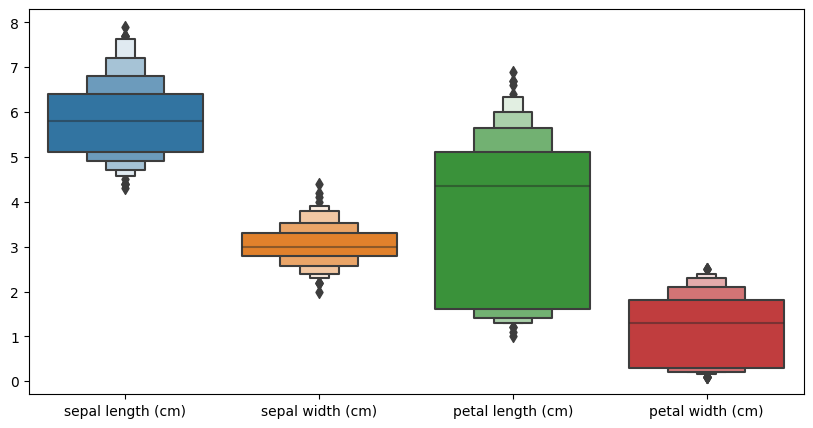

In [87]:
y_length = range(0,10)
plt.figure(figsize=(10,5))
sns.boxenplot(df_iris)

## 3. StandardScaler

In [94]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

iris_ss = SS.fit_transform(df_iris)


In [100]:
df_iris_ss = pd.DataFrame(iris_ss, columns=df_iris.columns)
df_iris_ss['species'] = iris.target
df_iris_ss.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


## 4. TRAIN / TEST 나누기

In [118]:
from sklearn.model_selection import train_test_split
import numpy as np

X = df_iris_ss[df_iris_ss.columns[:4]]
y = df_iris_ss['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=13)

#잘 나뉘었는지 검증
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

## 5. Pipeline

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

estimators = [
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=13, n_jobs=-1))
]
pipe = Pipeline(estimators)

## 6. GridSearch

In [136]:
from sklearn.model_selection import GridSearchCV

params = {
    'clf__max_depth' : [2,4,6,8],
    'clf__n_estimators' : [50, 100, 200],
    'clf__min_samples_leaf' : [5, 15],
    'clf__min_samples_split' : [5, 15]
}

gridsearch = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=13))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [2, 4, 6, 8],
                         'clf__min_samples_leaf': [5, 15],
                         'clf__min_samples_split': [5, 15],
                         'clf__n_estimators': [50, 100, 200]})

In [138]:
gridsearch.cv_results_

{'mean_fit_time': array([0.50325413, 0.79926162, 1.48183608, 0.48589802, 0.869873  ,
        1.65457234, 0.65085506, 0.85232153, 1.56860237, 0.54653826,
        0.73862572, 1.62365966, 0.43144536, 0.78909316, 1.66474242,
        0.50086265, 0.94188271, 1.51274829, 0.42885256, 0.92273188,
        1.75151358, 0.46375179, 0.89460282, 1.53808784, 0.35984139,
        0.61715026, 1.15850387, 0.36483231, 0.70571203, 1.24766321,
        0.33968945, 0.63848996, 1.22272801, 0.31535397, 0.59381275,
        1.19281101, 0.32253671, 0.68855476, 1.1744575 , 0.31216426,
        0.63649673, 1.33124022, 0.34168596, 0.55790715, 1.18902001,
        0.34188099, 0.57605753, 1.26701074]),
 'std_fit_time': array([0.08973495, 0.11798373, 0.19943804, 0.09336774, 0.10105498,
        0.11974935, 0.12339672, 0.13328014, 0.22996551, 0.13765661,
        0.08446999, 0.14427775, 0.05499219, 0.0701859 , 0.19512116,
        0.12215864, 0.17477392, 0.14268111, 0.03859071, 0.14427173,
        0.19397385, 0.1125483 , 0.163

## 7. dataframe

In [157]:
score_df = pd.DataFrame(gridsearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']].head()

,params,rank_test_score,mean_test_score,std_test_score
0,"{'clf__max_depth': 2, 'clf__min_samples_leaf':...",29,0.941667,0.042492
1,"{'clf__max_depth': 2, 'clf__min_samples_leaf':...",29,0.941667,0.042492
2,"{'clf__max_depth': 2, 'clf__min_samples_leaf':...",19,0.950000,0.048591
3,"{'clf__max_depth': 2, 'clf__min_samples_leaf':...",29,0.941667,0.042492
4,"{'clf__max_depth': 2, 'clf__min_samples_leaf':...",29,0.941667,0.042492


In [140]:
gridsearch.best_params_

{'clf__max_depth': 4,
 'clf__min_samples_leaf': 5,
 'clf__min_samples_split': 5,
 'clf__n_estimators': 50}

In [146]:
gridsearch.best_score_

0.9666666666666668

## 8. best_model

In [154]:
from sklearn.metrics import accuracy_score

best_model = gridsearch.best_estimator_
best_model.fit(X_train, y_train)

pred_test = best_model.predict(X_test)

accuracy_score(pred_test, y_test)

1.0

In [155]:
from sklearn.metrics import classification_report

print(classification_report(pred_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

